In [1]:
from src.test_non_local_switching_non_stationary_model import load_data

is_ripple, spikes, position, speed, env, time = load_data(work_computer=False)


In [2]:
from src.test_non_local_switching_non_stationary_model import (
    setup_nonlocal_switching_model,
)

(
    emission_design_matrix,
    emission_predict_matrix,
    initial_conditions,
    discrete_state_transitions,
    discrete_transition_coefficients,
    discrete_transition_design_matrix,
    continuous_state_transitions,
    state_ind,
    zero_rates,
    is_training,
    state_names,
) = setup_nonlocal_switching_model(
    is_ripple,
    spikes,
    position,
    speed,
    env,
    no_spike_rate_threshold=0.01,
    is_stationary_discrete_transition=True,
    include_no_spike_state=True,
)


In [3]:
import numpy as np


log_likelihood = np.load("log_likelihood_fragmented.npy")

In [4]:
# log_likelihood[:, state_ind==0]

Text(0.5, 1.0, 'Discrete State Transition')

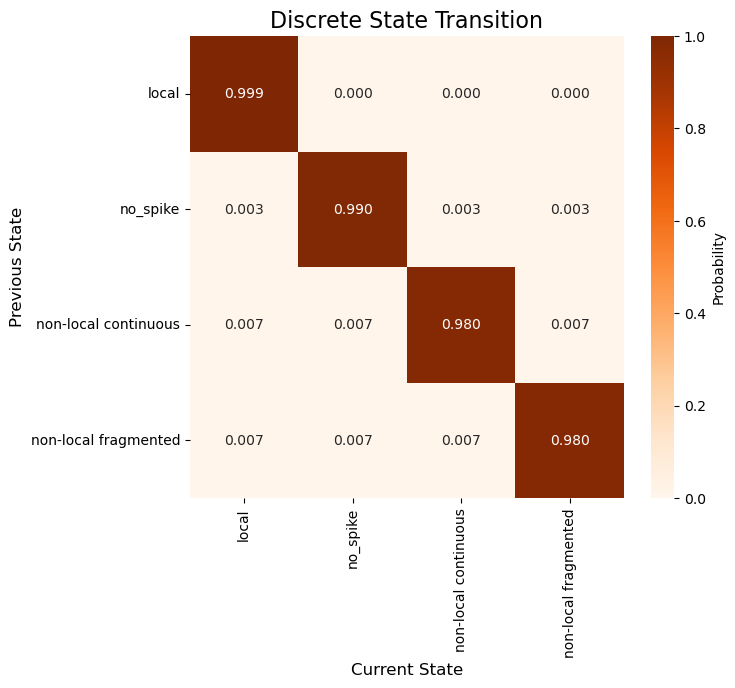

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

vmin, vmax, fmt = 0.0, 1.0, "0.03f"
label = "Probability"
cmap = "Oranges"

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sns.heatmap(
    data=discrete_state_transitions,
    vmin=vmin,
    vmax=vmax,
    annot=True,
    fmt=fmt,
    cmap=cmap,
    xticklabels=state_names,
    yticklabels=state_names,
    ax=ax,
    cbar_kws={"label": label},
)
ax.set_ylabel("Previous State", fontsize=12)
ax.set_xlabel("Current State", fontsize=12)
ax.set_title("Discrete State Transition", fontsize=16)

In [6]:
discrete_state_transitions.sum(axis=1)

array([1., 1., 1., 1.])

In [7]:
from src.test_non_local_switching_non_stationary_model import fit_switching_model
import numpy as np

stickiness = np.zeros((4,1))
stickiness[0] = 65
stickiness[1] = 100_000
stickiness[2] = 65
stickiness[3] = 65

(
    predicted_state,
    acausal_posterior,
    acausal_state_probabilities,
    causal_posterior,
    marginal_log_likelihoods,
    initial_conditions,
    discrete_state_transitions,
    discrete_transition_coefficients,
    discrete_transition_design_matrix,
    non_local_rates,
    log_likelihood,
) = fit_switching_model(
    spikes,
    emission_design_matrix,
    emission_predict_matrix,
    initial_conditions,
    discrete_state_transitions,
    continuous_state_transitions,
    state_ind,
    zero_rates,
    is_training,
    env,
    discrete_transition_coefficients=discrete_transition_coefficients,
    discrete_transition_design_matrix=discrete_transition_design_matrix,
    max_iter=20,
    fit_inital_conditions=False,
    fit_discrete_transition=True,
    fit_likelihood=False,
    is_no_spike_transition_constant=False,
    concentration=1.1,
    stickiness=stickiness,
    # log_likelihood=log_likelihood,
)


[[9.99000000e-01 3.33333333e-04 3.33333333e-04 3.33333333e-04]
 [3.33333333e-03 9.90000000e-01 3.33333333e-03 3.33333333e-03]
 [6.66666667e-03 6.66666667e-03 9.80000000e-01 6.66666667e-03]
 [6.66666667e-03 6.66666667e-03 6.66666667e-03 9.80000000e-01]]
Likelihoods


  0%|          | 0/104 [00:00<?, ?it/s]

Expectation Step
Maximization Step
Stats
iteration 1, likelihood: -1907375.5887287743
[[9.93063263e-01 1.16414202e-03 5.40679807e-03 3.65796797e-04]
 [4.18982257e-03 9.94003868e-01 1.47195833e-03 3.34350683e-04]
 [6.29537534e-03 1.78262385e-03 9.90088726e-01 1.83327529e-03]
 [2.06593129e-02 9.47588036e-03 2.64315039e-02 9.43433303e-01]]
Likelihoods
Expectation Step
Maximization Step
Stats
iteration 2, likelihood: -1905030.8129519895, change: 2344.775776784867
[[9.87247758e-01 2.05287854e-03 1.05417555e-02 1.57607645e-04]
 [6.39778786e-03 9.93059792e-01 4.72889410e-04 6.95309160e-05]
 [8.51151755e-03 8.84258177e-04 9.89261463e-01 1.34276095e-03]
 [3.32348646e-02 8.79004484e-03 3.05542899e-02 9.27420801e-01]]
Likelihoods
Expectation Step
Maximization Step
Stats
iteration 3, likelihood: -1904955.4096574516, change: 75.40329453791492


In [8]:
# non_local_rates = np.load("non_local_rates.npy")

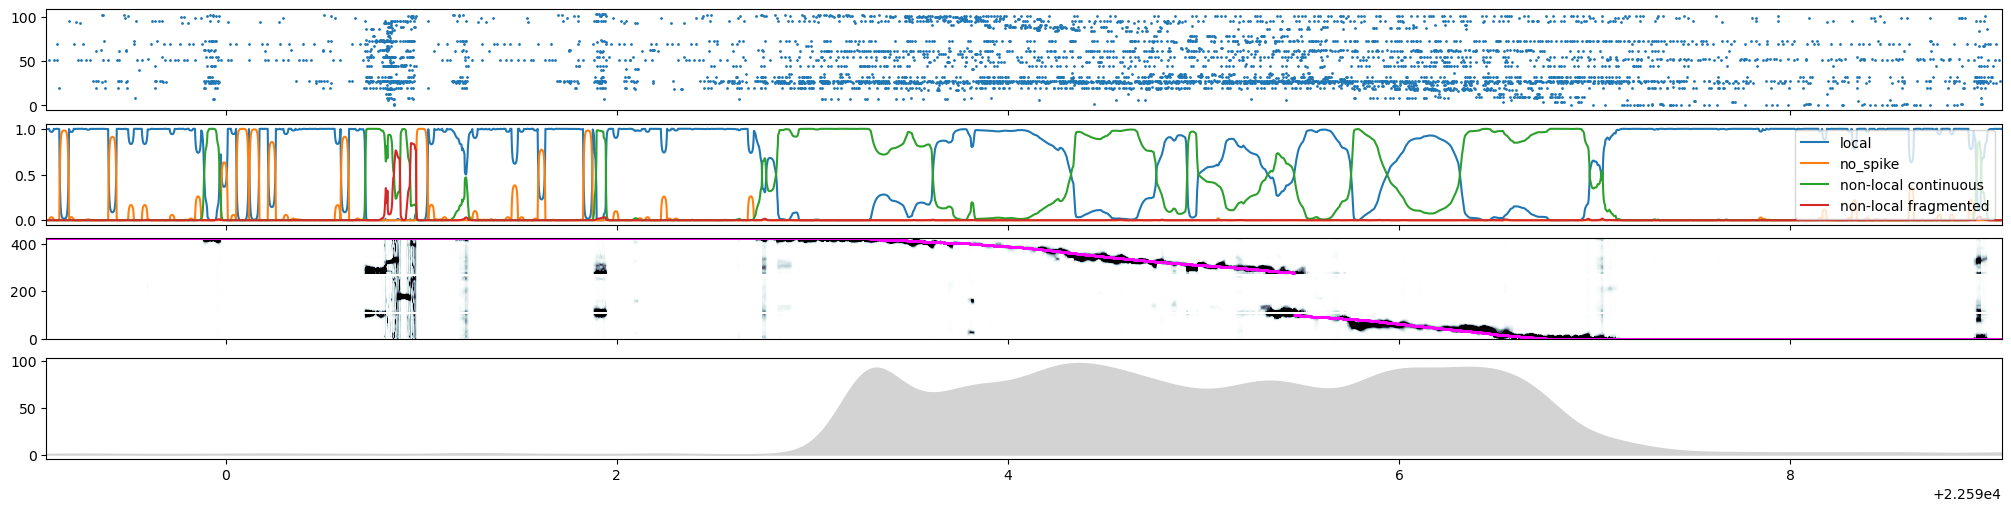

In [9]:
from src.test_non_local_switching_non_stationary_model import plot_switching_model


plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(100_000, 105_000),
)


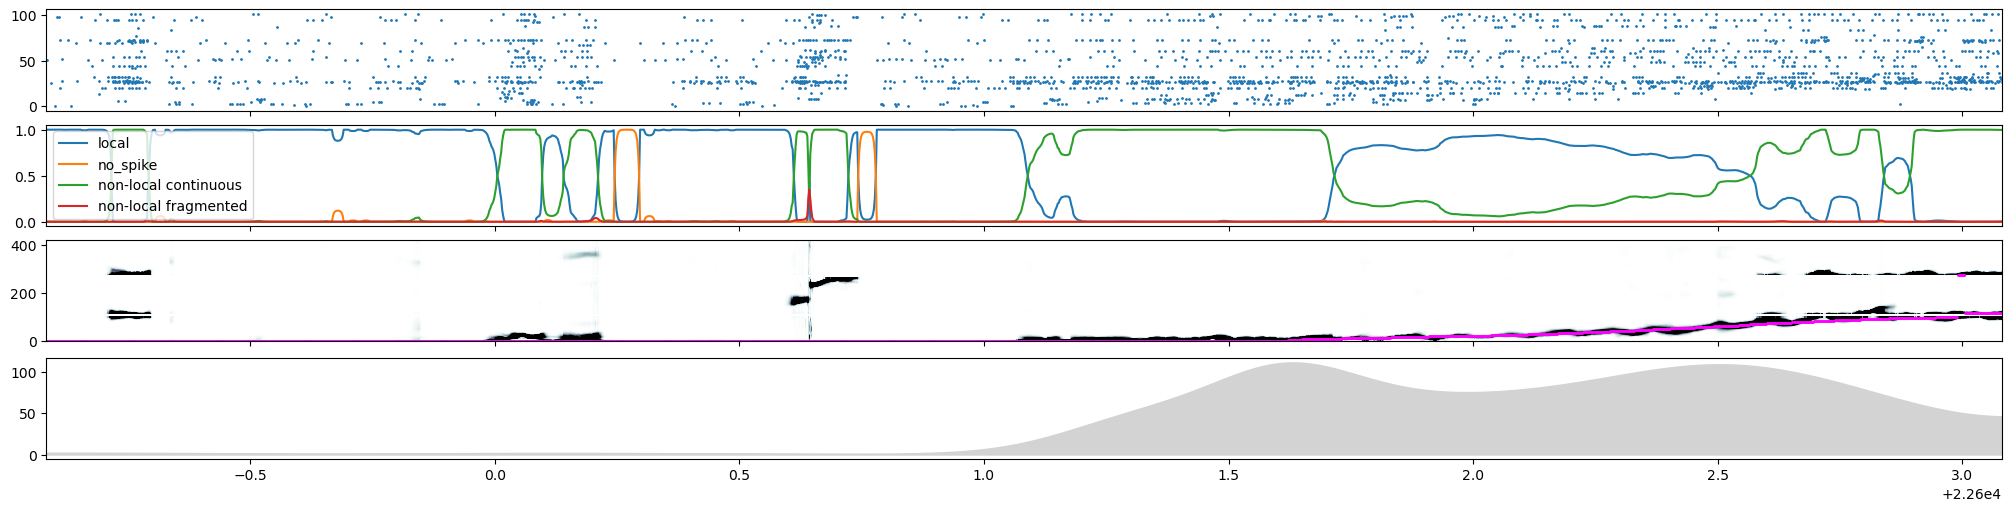

In [10]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(105_000, 107_000),
)


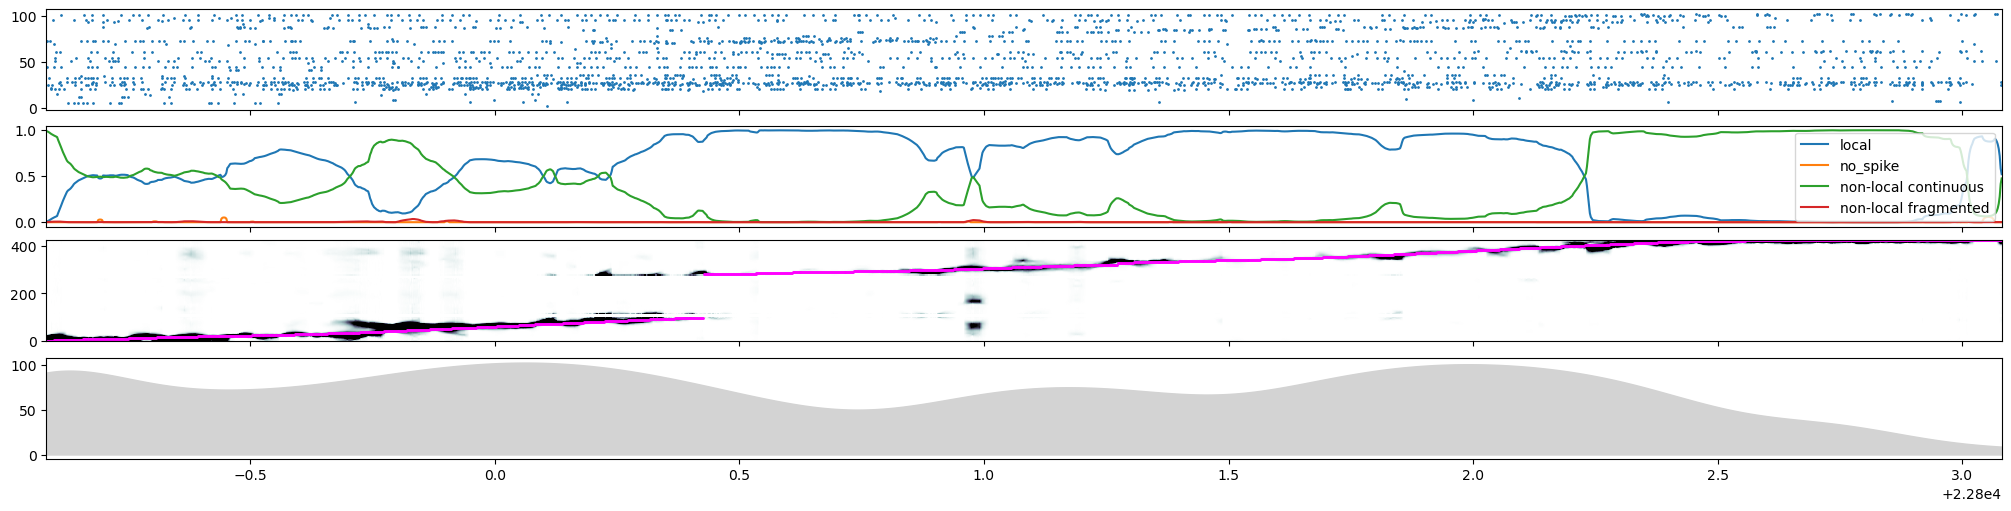

In [11]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(205_000, 207_000),
)


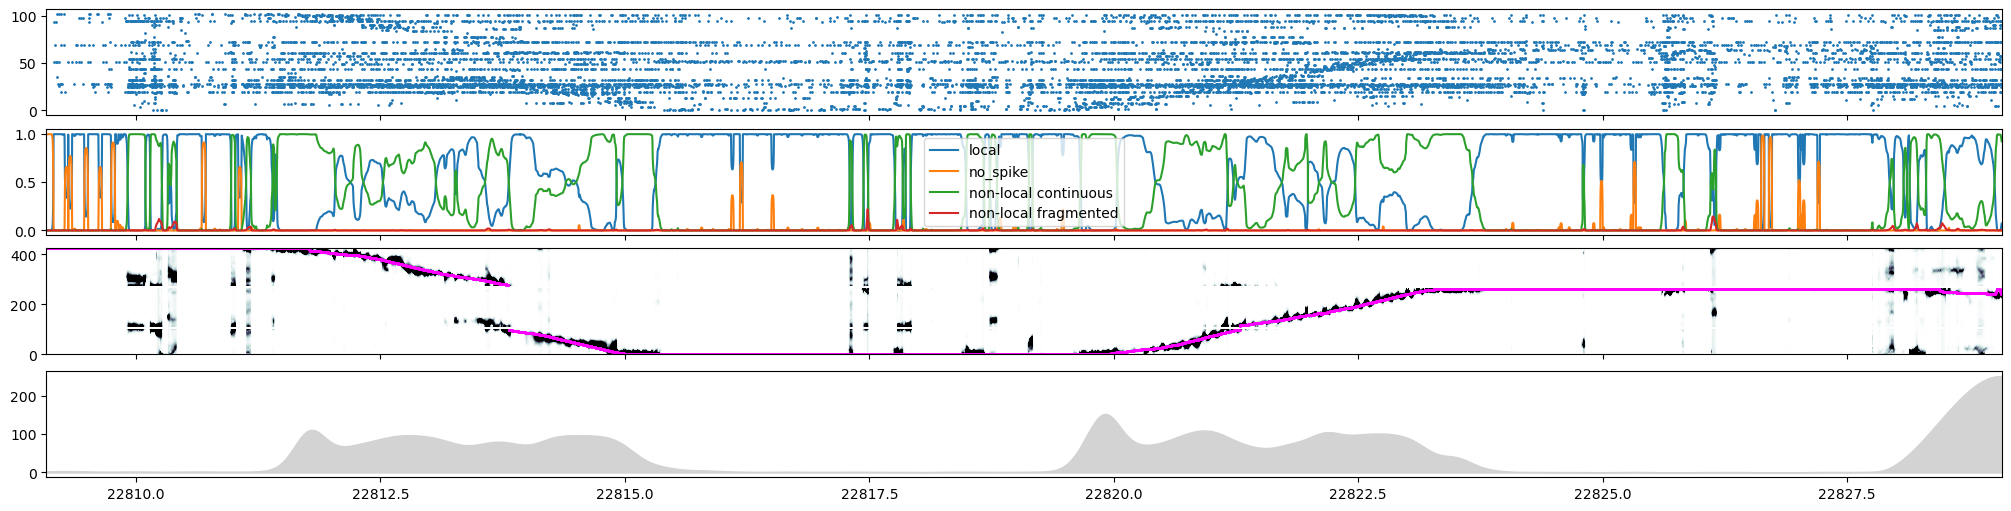

In [12]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(210_000, 220_000),
)


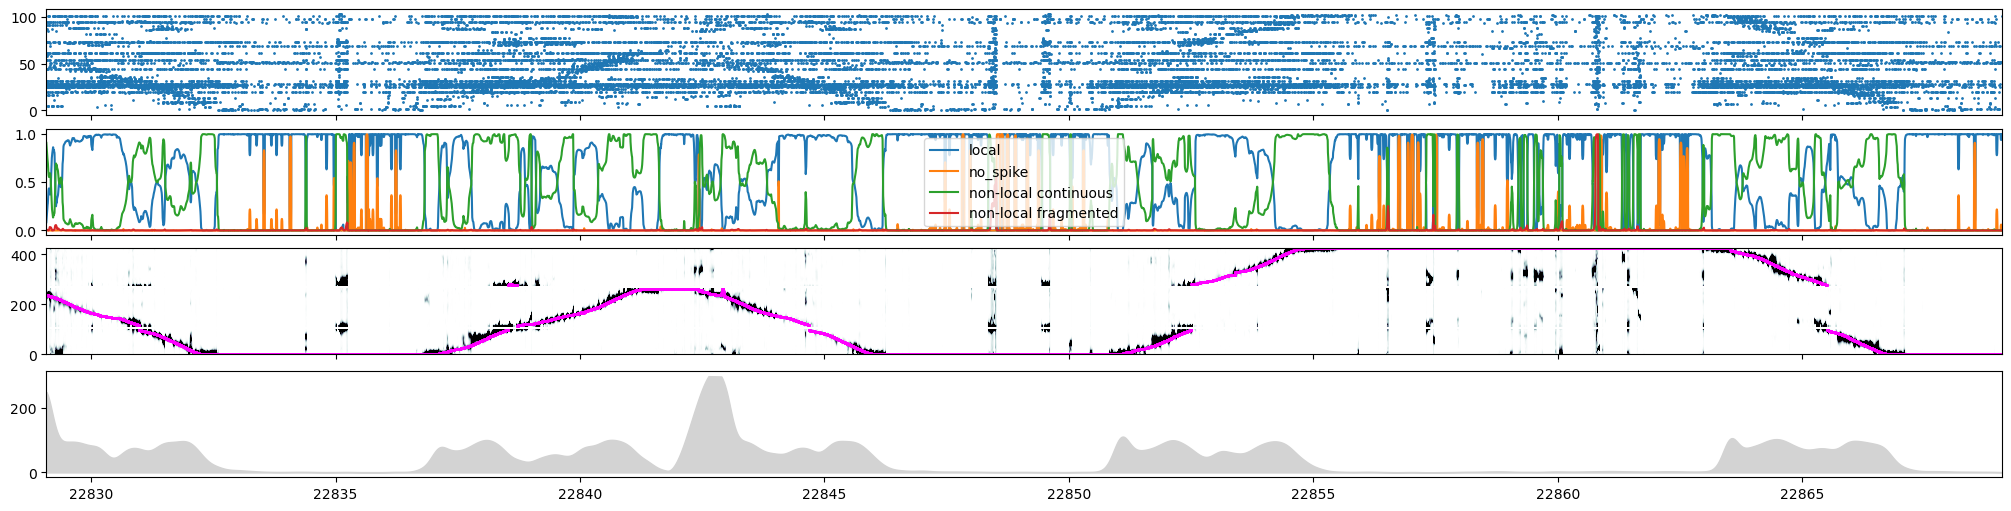

In [13]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(220_000, 240_000),
)


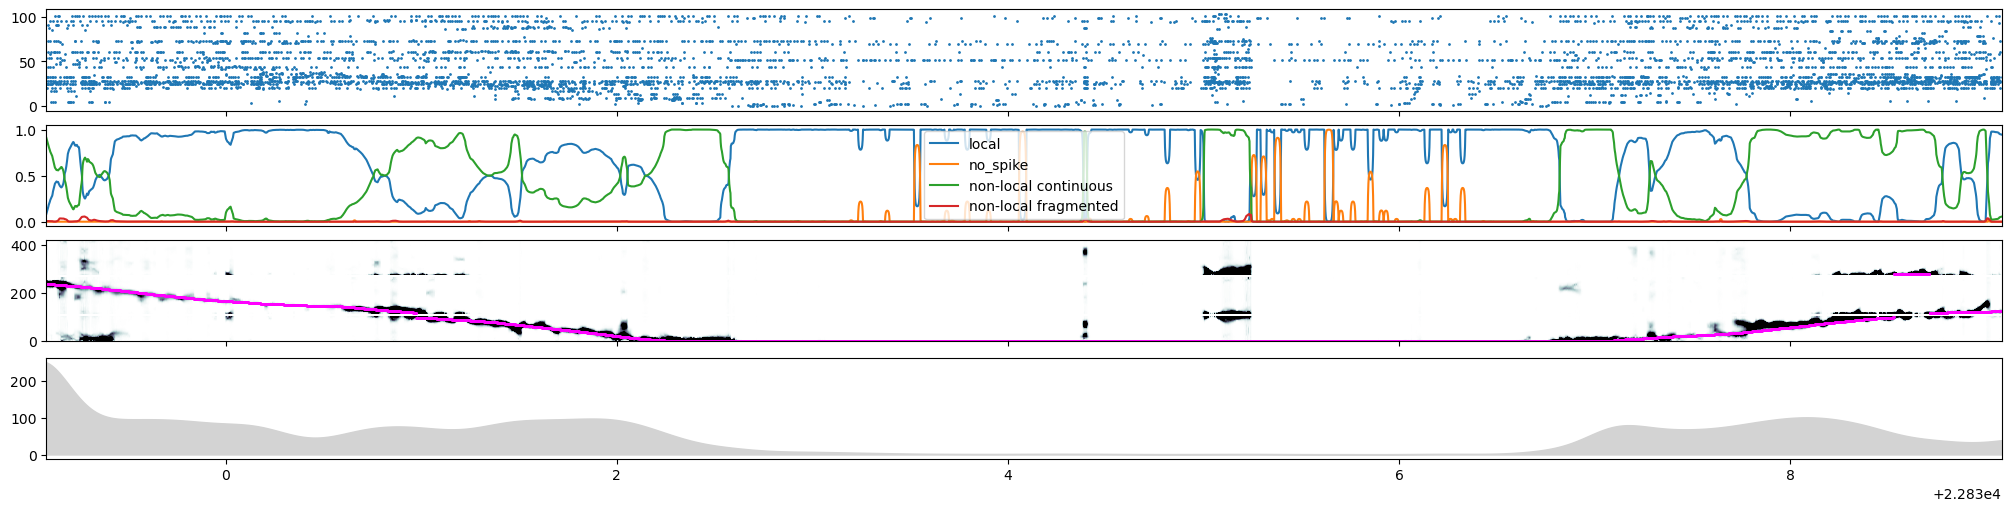

In [14]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(220_000, 225_000),
)


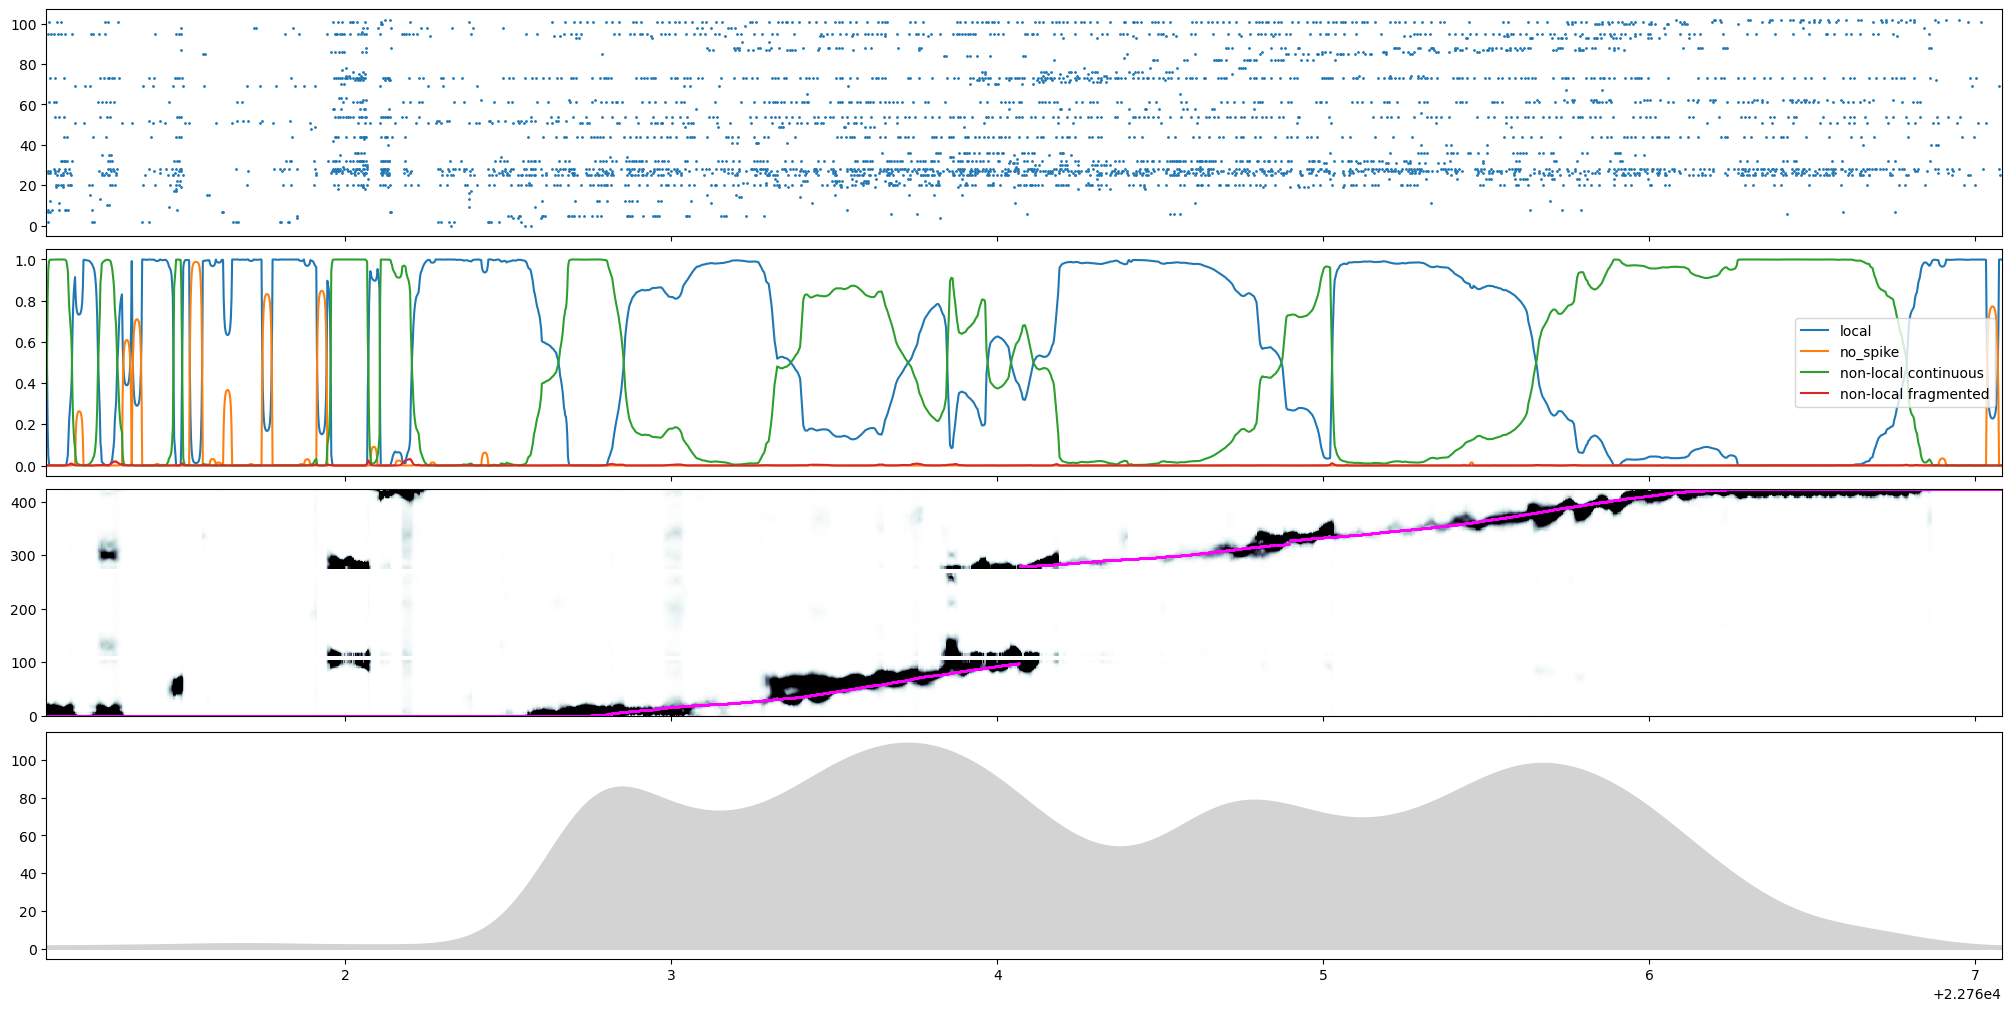

In [15]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(186_000, 189_000),
    figsize=(20, 10),
)


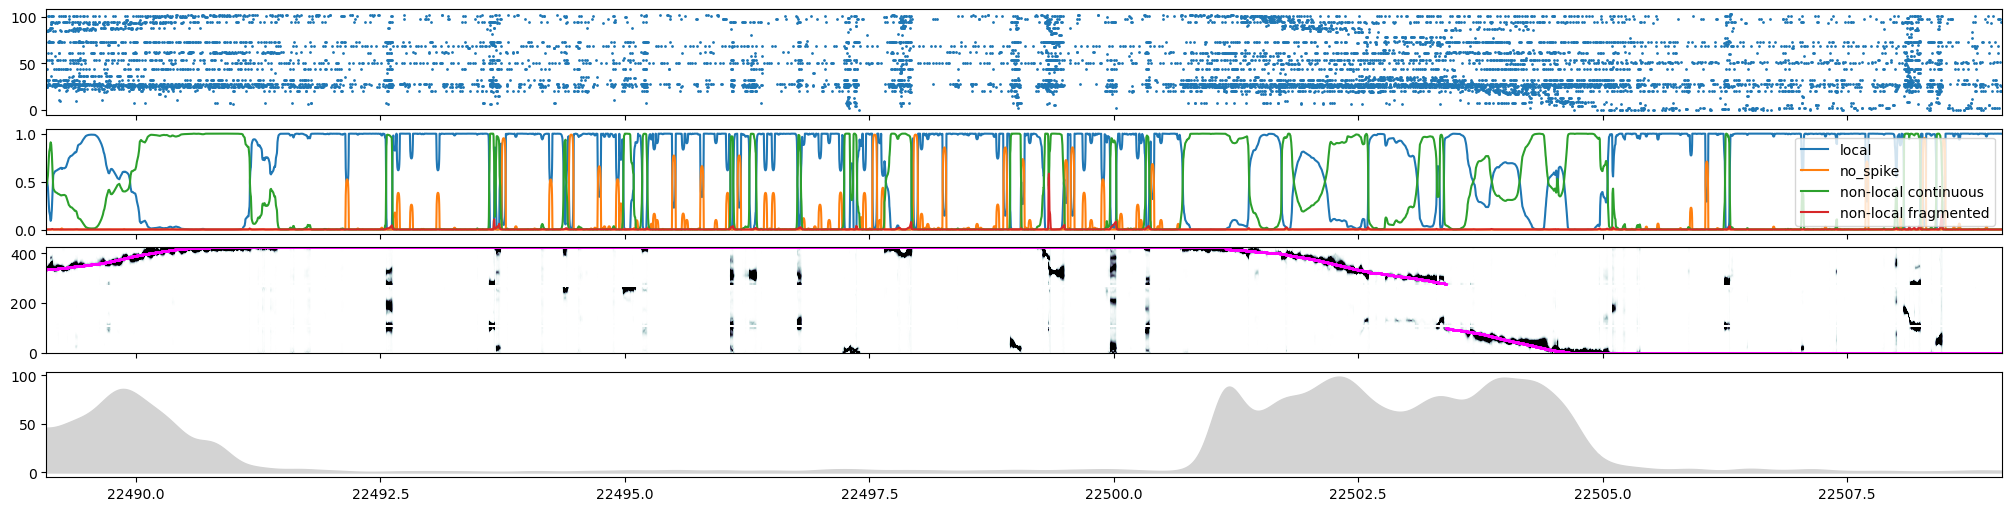

In [16]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    time_slice=slice(50_000, 60_000),
)


Text(0.5, 1.0, 'Discrete State Transition')

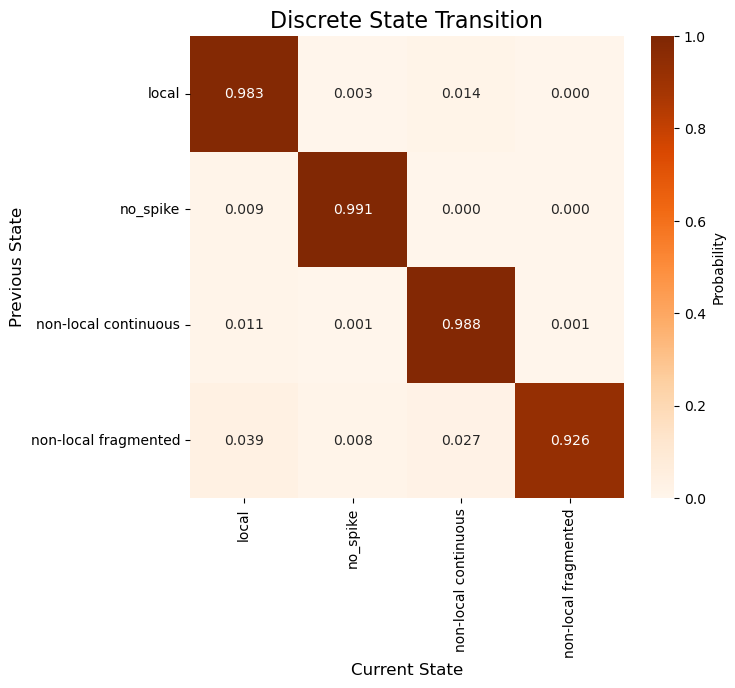

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

vmin, vmax, fmt = 0.0, 1.0, "0.03f"
label = "Probability"
cmap = "Oranges"

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sns.heatmap(
    data=discrete_state_transitions,
    vmin=vmin,
    vmax=vmax,
    annot=True,
    fmt=fmt,
    cmap=cmap,
    xticklabels=state_names,
    yticklabels=state_names,
    ax=ax,
    cbar_kws={"label": label},
)
ax.set_ylabel("Previous State", fontsize=12)
ax.set_xlabel("Current State", fontsize=12)
ax.set_title("Discrete State Transition", fontsize=16)